In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("career_data.csv", sep = '\t')

In [22]:
print(len(df))
print(df.head())

99
   interest_coding  interest_design  interest_science  interest_art  \
0                1                2                 2             3   
1                4                2                 4             1   
2                2                1                 1             1   
3                1                5                 2             5   
4                1                3                 2             5   

   interest_cooking  interest_travel  interest_business  math_skill  \
0                 1                3                  2           1   
1                 1                1                  2           3   
2                 1                1                  3           4   
3                 1                3                  3           2   
4                 1                5                  2           1   

   creativity  communication  introvert_extrovert  problem_solving  \
0           5              4                    3                3   
1  

In [23]:
print(df.shape)
print(df.isnull().sum())
print(df.describe())

(99, 13)
interest_coding        0
interest_design        0
interest_science       0
interest_art           0
interest_cooking       0
interest_travel        0
interest_business      0
math_skill             0
creativity             0
communication          0
introvert_extrovert    0
problem_solving        0
career                 0
dtype: int64
       interest_coding  interest_design  interest_science  interest_art  \
count        99.000000        99.000000         99.000000     99.000000   
mean          1.818182         2.474747          2.939394      2.434343   
std           1.003704         1.023633          1.292191      1.485725   
min           1.000000         1.000000          1.000000      1.000000   
25%           1.000000         2.000000          2.000000      1.000000   
50%           2.000000         2.000000          3.000000      2.000000   
75%           2.000000         3.000000          4.000000      4.000000   
max           5.000000         5.000000          5.00

In [37]:
print(df.dtypes)


interest_coding         int64
interest_design         int64
interest_science        int64
interest_art            int64
interest_cooking        int64
interest_travel         int64
interest_business       int64
math_skill              int64
creativity              int64
communication           int64
introvert_extrovert     int64
problem_solving         int64
career                 object
dtype: object


In [34]:
print(df.isnull().sum())


interest_coding        0
interest_design        0
interest_science       0
interest_art           0
interest_cooking       0
interest_travel        0
interest_business      0
math_skill             0
creativity             0
communication          0
introvert_extrovert    0
problem_solving        0
career                 0
dtype: int64


In [35]:
for col in df.columns[:-1]:
    if not df[col].between(1, 5).all():
        print(f"Invalid values in {col}")


In [36]:
print(df["career"].duplicated().sum())


0


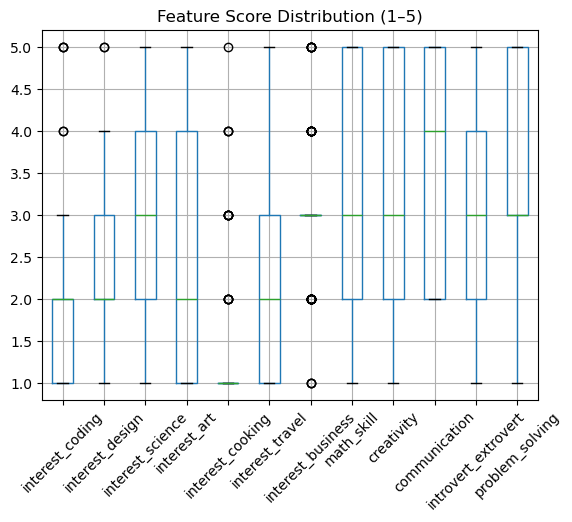

In [38]:
df.drop("career", axis=1).boxplot(rot=45)
plt.title("Feature Score Distribution (1–5)")
plt.show()


In [39]:
X = df.drop("career", axis = 1)
y = df["career"]

In [40]:
new_input = pd.DataFrame({
    'interest_coding': [4],
    'interest_design': [2],
    'interest_science': [4],
    'interest_art': [1],
    'interest_cooking': [1],
    'interest_travel': [2],
    'interest_business': [3],
    'math_skill': [4],
    'creativity': [4],
    'communication': [4],
    'introvert_extrovert': [3],
    'problem_solving': [5]
})


In [41]:
new_input = new_input[X.columns]

In [42]:
similarity_scores = cosine_similarity(new_input, X)[0]

In [43]:
df["similarity"] = similarity_scores

In [44]:
top_5 = df.sort_values(by="similarity", ascending=False).head(5)


In [45]:
print("Top 5 Recommended Careers:")
print(top_5[["career", "similarity"]])

Top 5 Recommended Careers:
                  career  similarity
50       Product Manager    0.983841
1          Cybersecurity    0.978133
53  System Administrator    0.974283
33          Statistician    0.967877
97     Actuarial Analyst    0.967877


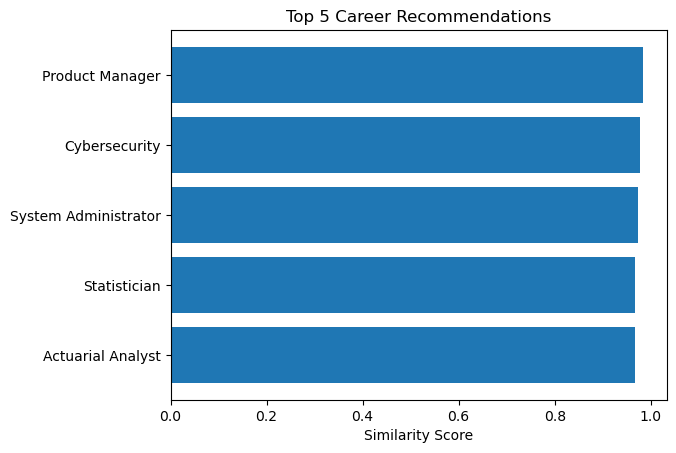

In [46]:
plt.barh(top_5["career"], top_5["similarity"])
plt.xlabel("Similarity Score")
plt.title("Top 5 Career Recommendations")
plt.gca().invert_yaxis()
plt.show()
